# Load previously cleaned and merged properties (comps)

The file being imported below was constructed in the last seven exploratory notebooks (1.0 to 1.6). These data have been cleaned and merged so we can start the exploratory data analysis.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import ROOT_DIR
from src.data.utils import Table, save_pickle

In [3]:
plt.style.use('seaborn-poster')

In [4]:
comps_fn = ROOT_DIR / 'data/interim/2016/comps.pickle'
assert comps_fn.exists()

with open(comps_fn, 'rb') as f:
    comps = pickle.load(f)

In [5]:
comps.shape

(957687, 83)

In [6]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957687 entries, 0 to 957686
Data columns (total 83 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   acct                                            957687 non-null  uint64        
 1   dscr                                            957687 non-null  category      
 2   date_erected                                    957687 non-null  uint16        
 3   yr_remodel                                      86406 non-null   float64       
 4   im_sq_ft                                        957684 non-null  float64       
 5   act_ar                                          957687 non-null  uint16        
 6   heat_ar                                         957683 non-null  float64       
 7   gross_ar                                        957687 non-null  uint16        
 8   eff_ar                            

In [7]:
comps.sample(10)

,acct,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
841128,1185850030006,Average,1998,NaN,2531.0,3044,2531.0,3044,2626.0,420.0,...,514.0,0.0,45.0,Average,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
1741,1246450040010,Average,2005,NaN,2713.0,3251,2713.0,3251,2813.0,420.0,...,0.0,32.0,0.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
797325,1166240020024,Average,1988,NaN,1629.0,2093,1629.0,2093,1804.0,248.0,...,0.0,24.0,0.0,Good,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
417402,891280000330,Average,1958,NaN,1536.0,1672,1536.0,1672,1581.0,182.0,...,0.0,120.0,16.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
741700,1150420010080,Average,1983,NaN,1564.0,2384,1564.0,2384,1818.0,210.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
469512,964130000020,Good,1964,NaN,2142.0,2346,2142.0,2346,2181.0,240.0,...,0.0,0.0,84.0,Fair,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average
81180,1282220080001,Average,2010,NaN,2360.0,2810,2360.0,2810,2396.0,314.0,...,0.0,0.0,50.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
373417,823720000012,Average,2015,NaN,3537.0,4255,3537.0,4255,3555.0,240.0,...,0.0,170.0,0.0,Average,New / Rebuilt,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
70151,1275880010041,Good,2008,NaN,3298.0,3868,3298.0,3868,3353.0,446.0,...,0.0,0.0,170.0,Average,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average
580387,1065980000169,Average,1976,NaN,1507.0,2151,1507.0,2151,1703.0,210.0,...,0.0,90.0,0.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average


## Drop account numbers
The account numbers are kept as a reference to the raw data, but should not be used in the EDA. Since they are unique, let's use them as index in the comps dataframe.

In [8]:
comps['acct'].is_unique

True

In [9]:
comps.set_index('acct', inplace=True)

In [10]:
comps.sample(10)

,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,fireplace_masonry_firebrick,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
acct,,,,,,,,,,,,,,,,,,,,,
1145580060010,Average,1983,NaN,963.0,1360,963.0,1360,1110.0,170.0,0.0,...,0.0,45.0,0.0,Average,NaN,Brick / Masonry,Slab,C,Central Heat/AC,Average
1179590040023,Good,1994,NaN,2505.0,3499,2505.0,3499,2795.0,262.0,0.0,...,392.0,0.0,168.0,Good,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average
1285090020006,Average,2007,NaN,2442.0,2978,2442.0,2978,2497.0,312.0,0.0,...,0.0,80.0,36.0,Average,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
1237060020028,Average,2004,NaN,2183.0,2579,2183.0,2579,2236.0,316.0,0.0,...,0.0,0.0,35.0,Average,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
1047030000010,Good,1972,NaN,2748.0,3492,2748.0,3492,2881.0,384.0,1.0,...,56.0,220.0,40.0,Very Good,NaN,Brick / Masonry,Slab,B,Central Heat/AC,Average
1159300040012,Average,1986,NaN,1747.0,2462,1747.0,2462,2003.0,216.0,0.0,...,0.0,231.0,84.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
1268230010011,Average,2005,NaN,2476.0,3211,2476.0,3211,2753.0,248.0,0.0,...,0.0,0.0,45.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
1111140000061,Average,2003,NaN,1350.0,1618,1350.0,1618,1450.0,194.0,0.0,...,0.0,28.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C-,Central Heat/AC,Average
621740620001,Low,1945,NaN,1256.0,1400,1256.0,1400,1304.0,156.0,0.0,...,0.0,108.0,0.0,Average,NaN,Asbestos,Crawl Space,D+,Central Heat,Average


# Build target column
The purpose of this work is to find if a given property was fairly appraised when compared with with similar properties.

For this we could find the distribution of similar properties total appraised value (`tot_appr_val`) and locate where our target distribution falls. However, since there is a wide range of property values given their location (neighborhood), physical condition, renovation, and other factors, it might be best to focus on the year-to-year percent change in property value:

`yy_pct_change` = (`tot_appr_val` - `prior_tot_appr_val`) / `prior_tot_appr_val`

## Drop NaNs in value colums

In [11]:
cond0 = comps['prior_tot_appr_val'].isna()
cond1 = comps['tot_appr_val'].isna()

In [12]:
print(f'Percent of prior_tot_appr_val missing values: {cond0.sum() / cond0.shape[0]}')
print(f'Percent of tot_appr_val missing values: {cond1.sum() / cond1.shape[0]}')

Percent of prior_tot_appr_val missing values: 0.0017416963997631794
Percent of tot_appr_val missing values: 6.2650949631769045e-06


In [13]:
comps = comps.loc[~cond0 & ~cond1, :]

## Drop samples where prior_tot_appr_val is zero

In [14]:
cond0 = comps['prior_tot_appr_val'] == 0

cond0.sum()

30

In [15]:
comps = comps.loc[~cond0, :]

## Build year-to-year percent change value

In [16]:
comps['yy_pct_change'] = (comps['tot_appr_val'] - comps['prior_tot_appr_val']) / comps['prior_tot_appr_val']

In [17]:
comps['yy_pct_change'].describe()

count    955987.000000
mean          0.165984
std           8.581103
min          -0.870447
25%           0.030657
50%           0.099989
75%           0.099999
max        7151.941176
Name: yy_pct_change, dtype: float64

## Remove exceedingly large value changes

There are valid reasons for a property value appreciation from year-to-year to be multiples of the initial value, for example, when a new house is constructed on an existing lot, the previous year value will be the value of the land alone, and the current year value will be the value of the land plus the value of the improvement (built house).

Similarly, when the existing house in the prior year is a tear-down, we can expect the value of the property to increase significantly if the owner has removed the old house and built a new one on its place. This is fairly common on neighborhoods with new constructions restrictions, like The Heights. 

Also, we can expect a large value increase if there has been a major remodeling that either increased the number of rooms of baths (fixtures), common on fixer-uppers, but this work generally increases the value of a property by a fraction, and not whole multipliers.

I'm primarily concerned with finding the comparable properties to my house, that was already there in 2015 (no new construction), and had no remodeling done (no fixtures change). For this, I'll filter out all samples outside the [-1, 1] appreciation percent range.

### Remove new constructions and recent remodels

In [18]:
comps['lastest_const_year'] = comps['yr_remodel'].fillna(comps['date_erected'])

In [19]:
cond0 = (comps['lastest_const_year'] >= 2015)

In [20]:
print(f'Number of new constructions or newly remodeled properties: {cond0.sum()}')
print(f'Percent of total: {cond0.sum() / comps.shape[0]:.2f} %')

Number of new constructions or newly remodeled properties: 10020
Percent of total: 0.01 %


In [21]:
comps = comps.loc[~cond0, :]

### Remove real (bad data) outliers
Large value changes that where not captured by the new construction and remodel filter above, might be a result of problems with the data.

In [22]:
cond0 = comps['yy_pct_change'].between(-1,1)

In [23]:
outliers = comps.loc[~cond0, ['yy_pct_change', 'tot_appr_val', 'prior_tot_appr_val', 'lastest_const_year']]

In [24]:
outliers.shape

(3036, 4)

In [25]:
outliers.describe()

,yy_pct_change,tot_appr_val,prior_tot_appr_val,lastest_const_year
count,3036.000000,3.036000e+03,3.036000e+03,3036.000000
mean,2.107496,3.272255e+05,1.225868e+05,1999.955534
std,1.900489,3.275134e+05,1.367662e+05,26.070637
min,1.000456,7.900000e+03,1.000000e+03,1870.000000
25%,1.183824,1.440250e+05,3.918075e+04,2004.000000
50%,1.484603,2.498880e+05,8.927750e+04,2014.000000
75%,2.209001,4.104905e+05,1.545838e+05,2014.000000
max,45.160430,4.122500e+06,1.651458e+06,2014.000000


In [26]:
outliers.head()

,yy_pct_change,tot_appr_val,prior_tot_appr_val,lastest_const_year
acct,,,,
1246690050002,1.903595,277874.0,95700.0,2004.0
1246850040098,2.723202,430350.0,115586.0,2014.0
1246690060002,1.672421,270449.0,101200.0,2005.0
1246850040097,1.527229,394551.0,156120.0,2014.0
1248420020020,1.255845,414498.0,183744.0,2014.0


for example, from the five outliers examples above, the older houses (latest_const_year 1920, 1938, 1945) are probably remodels or new constructions from tear-downs that didn't reflect the constructions updates in this database.

The more recent properties (2014, 2013) apparently didn't realize their full value until later, a sort of edge effect depending on when was the construction finished during the year.

In [27]:
print(f'Number of outliers to be removed: {outliers.shape[0]}')
print(f'Percent of outliers to be removed: {outliers.shape[0] / comps.shape[0]:.4f} %')

Number of outliers to be removed: 3036
Percent of outliers to be removed: 0.0032 %


In [28]:
comps = comps.loc[cond0, :]

## Examine target after outliers removal

In [29]:
comps['yy_pct_change'].describe()

count    942931.000000
mean          0.077793
std           0.085150
min          -0.870447
25%           0.029524
50%           0.099987
75%           0.099999
max           1.000000
Name: yy_pct_change, dtype: float64

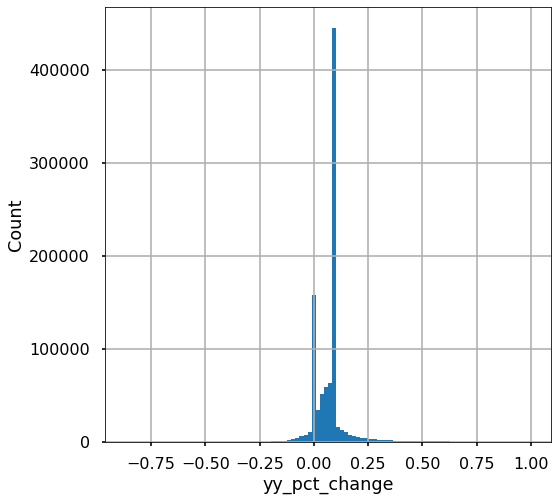

In [30]:
_ = plt.figure(figsize=(8,8))
_ = comps['yy_pct_change'].hist(bins=100)
_ = plt.xlabel('yy_pct_change')
_ = plt.ylabel('Count')

In [31]:
print(pd.cut(comps['yy_pct_change'], bins=100).value_counts())
print(pd.cut(comps['yy_pct_change'], bins=100).value_counts(normalize=True))

(0.0835, 0.102]     445667
(-0.01, 0.00866]    157620
(0.0648, 0.0835]     63148
(0.0461, 0.0648]     59267
(0.0274, 0.0461]     51984
                     ...  
(-0.758, -0.74]          2
(-0.683, -0.665]         1
(-0.814, -0.796]         1
(-0.721, -0.702]         0
(-0.852, -0.833]         0
Name: yy_pct_change, Length: 100, dtype: int64
(0.0835, 0.102]     0.472640
(-0.01, 0.00866]    0.167160
(0.0648, 0.0835]    0.066970
(0.0461, 0.0648]    0.062854
(0.0274, 0.0461]    0.055130
                      ...   
(-0.758, -0.74]     0.000002
(-0.683, -0.665]    0.000001
(-0.814, -0.796]    0.000001
(-0.721, -0.702]    0.000000
(-0.852, -0.833]    0.000000
Name: yy_pct_change, Length: 100, dtype: float64


This is interesting. There is a spike in the 10% value increase mark. This is possibly related to [Capped Appraisal Values](https://hcad.org/hcad-resources/hcad-residential-property/hcad-capped-appraisal-values/), where the appraisal district will cap the value of an existing property if the current year appraised value is more than 10% of last year's. Also, the property has to be homestead exempt for the current and prior year to be eligible for this benefit.

We can see in the histogram that about 445000 properties qualified for this capping rule. Neat!

There is a lesser spike near 0 % value increase, but its origin is less clear.

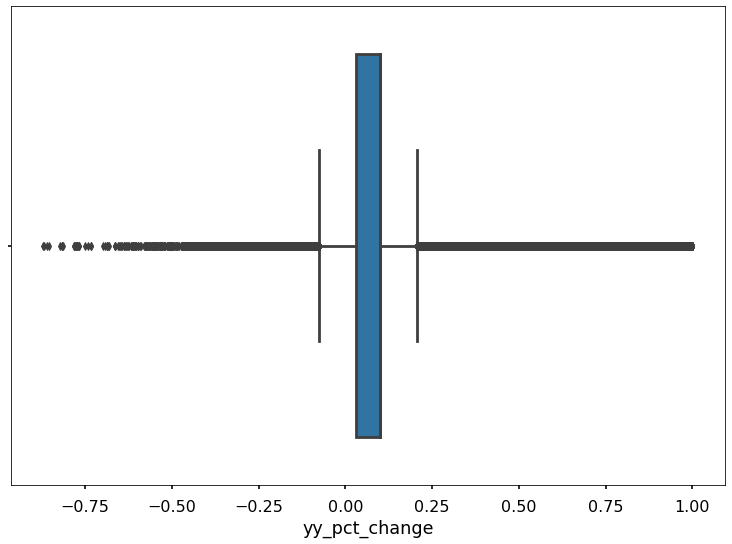

In [32]:
_ = sns.boxplot(x=comps['yy_pct_change'])

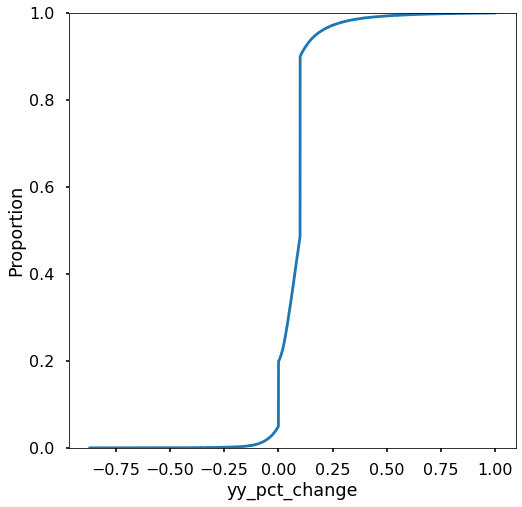

In [33]:
_ = plt.figure(figsize=(8, 8))
_ = sns.ecdfplot(x='yy_pct_change', data=comps)

# Select the comparable properties

The histogram on year-to-tear percent change appraise value above shows that most properties appreciated up to 40%, and depreciated down to 25%. While this is insightful, the spread is too broad as it accounts for almost all properties in the district, with all sorts of conditions, year built, neighborhood, and many other variables.

In this step we will select the comparable properties to my property of interest by counting only properties in the same subdivision.

In [34]:
cond0 = comps['lgl_2'].str.contains('PARK AT KLEIN SEC 1', case=False, na=False, regex=False)

subdiv = comps.loc[cond0, :]

In [35]:
subdiv.shape

(72, 84)

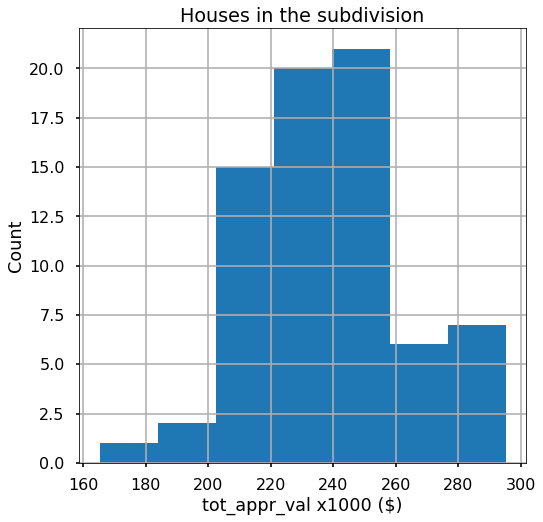

In [36]:
_ = plt.figure(figsize=(8,8))
_ = (subdiv['tot_appr_val']/1000).hist(bins=7)
_ = plt.title('Houses in the subdivision')
_ = plt.xlabel('tot_appr_val x1000 ($)')
_ = plt.ylabel('Count')

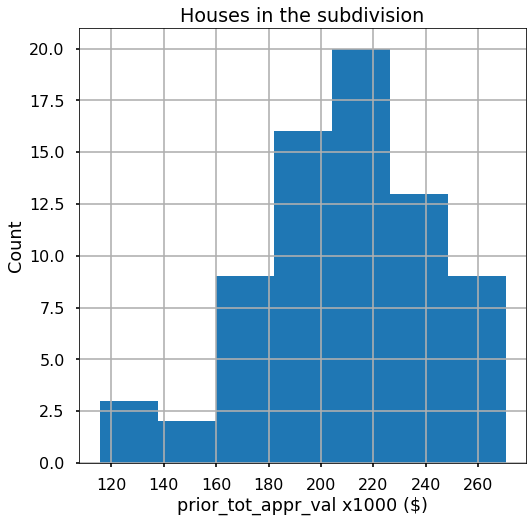

In [37]:
_ = plt.figure(figsize=(8,8))
_ = (subdiv['prior_tot_appr_val']/1000).hist(bins=7)
_ = plt.title('Houses in the subdivision')
_ = plt.xlabel('prior_tot_appr_val x1000 ($)')
_ = plt.ylabel('Count')

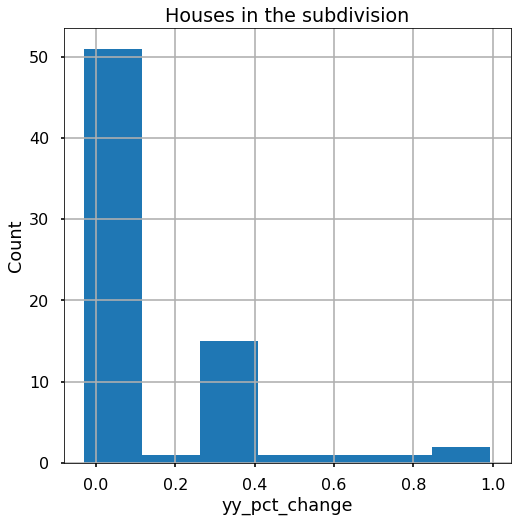

In [38]:
_ = plt.figure(figsize=(8,8))
_ = subdiv['yy_pct_change'].hist(bins=7)
_ = plt.title('Houses in the subdivision')
_ = plt.xlabel('yy_pct_change')
_ = plt.ylabel('Count')

Now this seems strange. A lot of houses value in the prior year (2015) are less than $200k. I think most of these houses were still under construction, and thus their values were not fully realized at that time.

Let's drop them.

In [39]:
cond0 = subdiv['prior_tot_appr_val'] > 200_000

subdiv_finished = subdiv.loc[cond0, :].copy()

In [40]:
subdiv_finished.shape

(48, 84)

So we lost 24 properties (72 - 48).

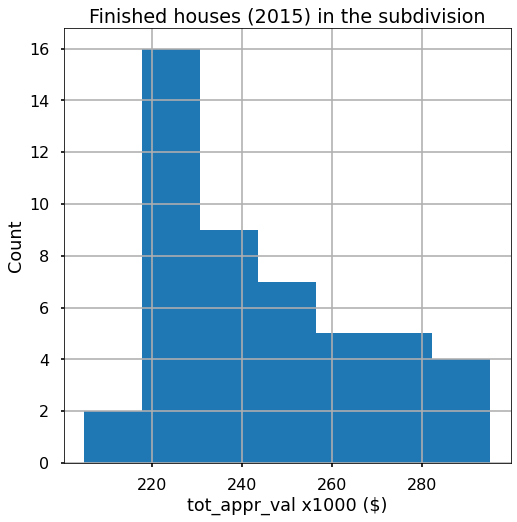

In [41]:
_ = plt.figure(figsize=(8,8))
_ = (subdiv_finished['tot_appr_val']/1000).hist(bins=7)
_ = plt.title('Finished houses (2015) in the subdivision')
_ = plt.xlabel('tot_appr_val x1000 ($)')
_ = plt.ylabel('Count')

# Preliminary report

Since there are 84 features in this dataset, it is best to explore them using an automated tool like [Sweetviz](https://github.com/fbdesignpro/sweetviz). This will take care of building the histograms and summary statistics for each feature, and also will provide an association plot between all the variables. I will select the variables from this plot to further investigate interesting associations.

## Reset dtypes to work with Sweetviz
Running `sweetviz` with the `comps` data "as is" was throwing a `TypeError` associated with the categorical columns, so here I change their type to `object`.

In [42]:
for col in subdiv_finished.columns:
    if str(subdiv_finished[col].dtype) == 'category':
        subdiv_finished[col] = subdiv_finished[col].astype('object')

In [43]:
subdiv_finished.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 48 entries, 1347180010015 to 1347180030026
Data columns (total 84 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   dscr                                            48 non-null     object        
 1   date_erected                                    48 non-null     uint16        
 2   yr_remodel                                      0 non-null      float64       
 3   im_sq_ft                                        48 non-null     float64       
 4   act_ar                                          48 non-null     uint16        
 5   heat_ar                                         48 non-null     float64       
 6   gross_ar                                        48 non-null     uint16        
 7   eff_ar                                          48 non-null     float64       
 8   perimeter                   

## Run Sweetviz

In [44]:
import sweetviz as sv

In [45]:
# This can take a long time to run (~37 min), change flag to True if need to re-run
if False:
    my_report = sv.analyze(subdiv_finished, target_feat='tot_appr_val')
    my_report.show_html(filepath='SWEETVIZ_REPORT_tot_appr_val_subdivision_finished.html')

The cell above creates a file (notebooks/01_Exploratory/SWEETVIZ_REPORT_tot_appr_val_subdivision_finished.html) with the resulting plots.

# Features exploration
Let's start by review the association plot in the sweetviz report.

![Sweetviz all variables association](figures/sv_all_variables_association_subdivision_finished.png)

Impressive!

There is a strong association in most variables. I'm particularly interested in exploring the associations with the total appraise value (`tot_appr_val`) so let's look at its individual association table.

![total apprasied value association tables](figures/tot_appr_val_associations_tables_subdivision_finished.png)

Now let's select the numerical and categorical features with strong association (> 0.59) to our target variable and examine these in detail.

In [46]:
num_features = [
    'act_ar',
    'gross_ar',
    'eff_ar',
    'im_sq_ft',
    'heat_ar',
    'bld_ar',
    'prior_tot_appr_val',
    'base_area_upr',
    'perimeter'
]
    
cat_features = [
    'fixtures_total',
    'room_half_bath',
    'room_total',
    'room_bedroom',
    'room_rec',
    'room_full_bath',
    'story_height_index'
]

# Selected features analysis

## Total appraised value: tot_appr_val
Let's begin with a description of our target variable: total appraised value.

In [47]:
from src.visualization.visualize import plot_ecdf, plot_counts, plot_hist

Check for null values

In [48]:
subdiv_finished['tot_appr_val'][subdiv_finished['tot_appr_val'].isna()]

Series([], Name: tot_appr_val, dtype: float64)

let's remove these from the comps dataframe

In [49]:
subdiv_finished.dropna(axis=0, how='any', subset=['tot_appr_val'], inplace=True)

Now let's build the plots

In [50]:
col ='tot_appr_val'
series = subdiv_finished[col]

In [51]:
series.describe()

count        48.000000
mean     244629.770833
std       23036.632471
min      205000.000000
25%      226696.500000
50%      240916.500000
75%      256759.750000
max      295070.000000
Name: tot_appr_val, dtype: float64

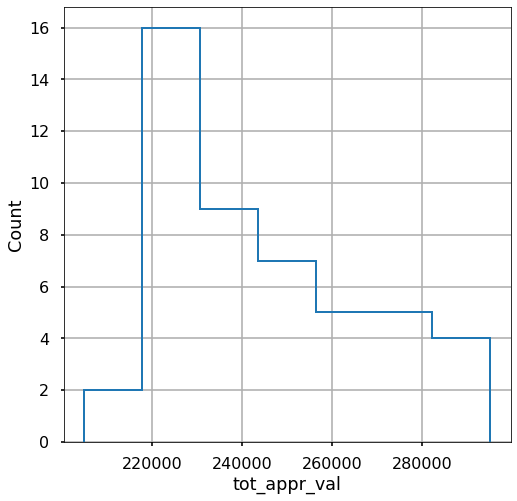

In [53]:
plot_hist(series, col, bins=7)

So the most common value is around $220k with a right-skewed distribution.

Quantile 10%: 220593.10
Quantile 25%: 226696.50
Quantile 50%: 240916.50
Quantile 75%: 256759.75
Quantile 90%: 278984.60


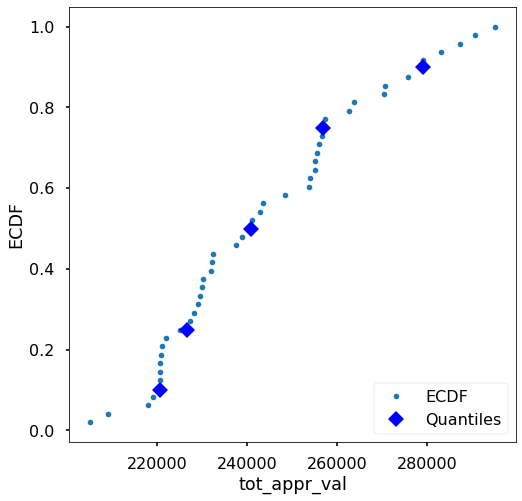

In [54]:
plot_ecdf(series, col)

More than 90% of the properties are valued less than ~$280K

## Check for features interdependence
I'd like to drop highly interdependent features. Since there are so many to check, I'll group, compare, and select them first by major categories (area and fixtures), and then repeat the process for the final feature selection. 

## Area metric

These features were encountered first on the notebook: [notebooks/01_Exploratory/1.0-rp-hcad-data-view-building-res](1.0-rp-hcad-data-view-building-res.ipynb) and [notebooks/01_Exploratory/1.0-rp-hcad-data-view-exterior](1.0-rp-hcad-data-view-exterior.ipynb).

Here is a brief description:

1. im_sq_ft: Improvement area.
2. act_ar: Actual area. For residential properties this is the base area of the house.
3. heat_ar: Living Area or Building sqft of a residential building. 
4. gross_ar: Usually equal to Actual area, except in 1+1/2 story houses. Commercial properties do not use Gross Area.
5. eff_ar: Effective area. This is used in determining the market value of the improvements, but there is no clear definition in the HCAD website.
6. base_area_upr: Possibly the upper floor base area.

In [55]:
areas = [
    'act_ar',
    'gross_ar',
    'eff_ar',
    'im_sq_ft',
    'heat_ar',
    'bld_ar',
    'base_area_upr',
    'perimeter'
]

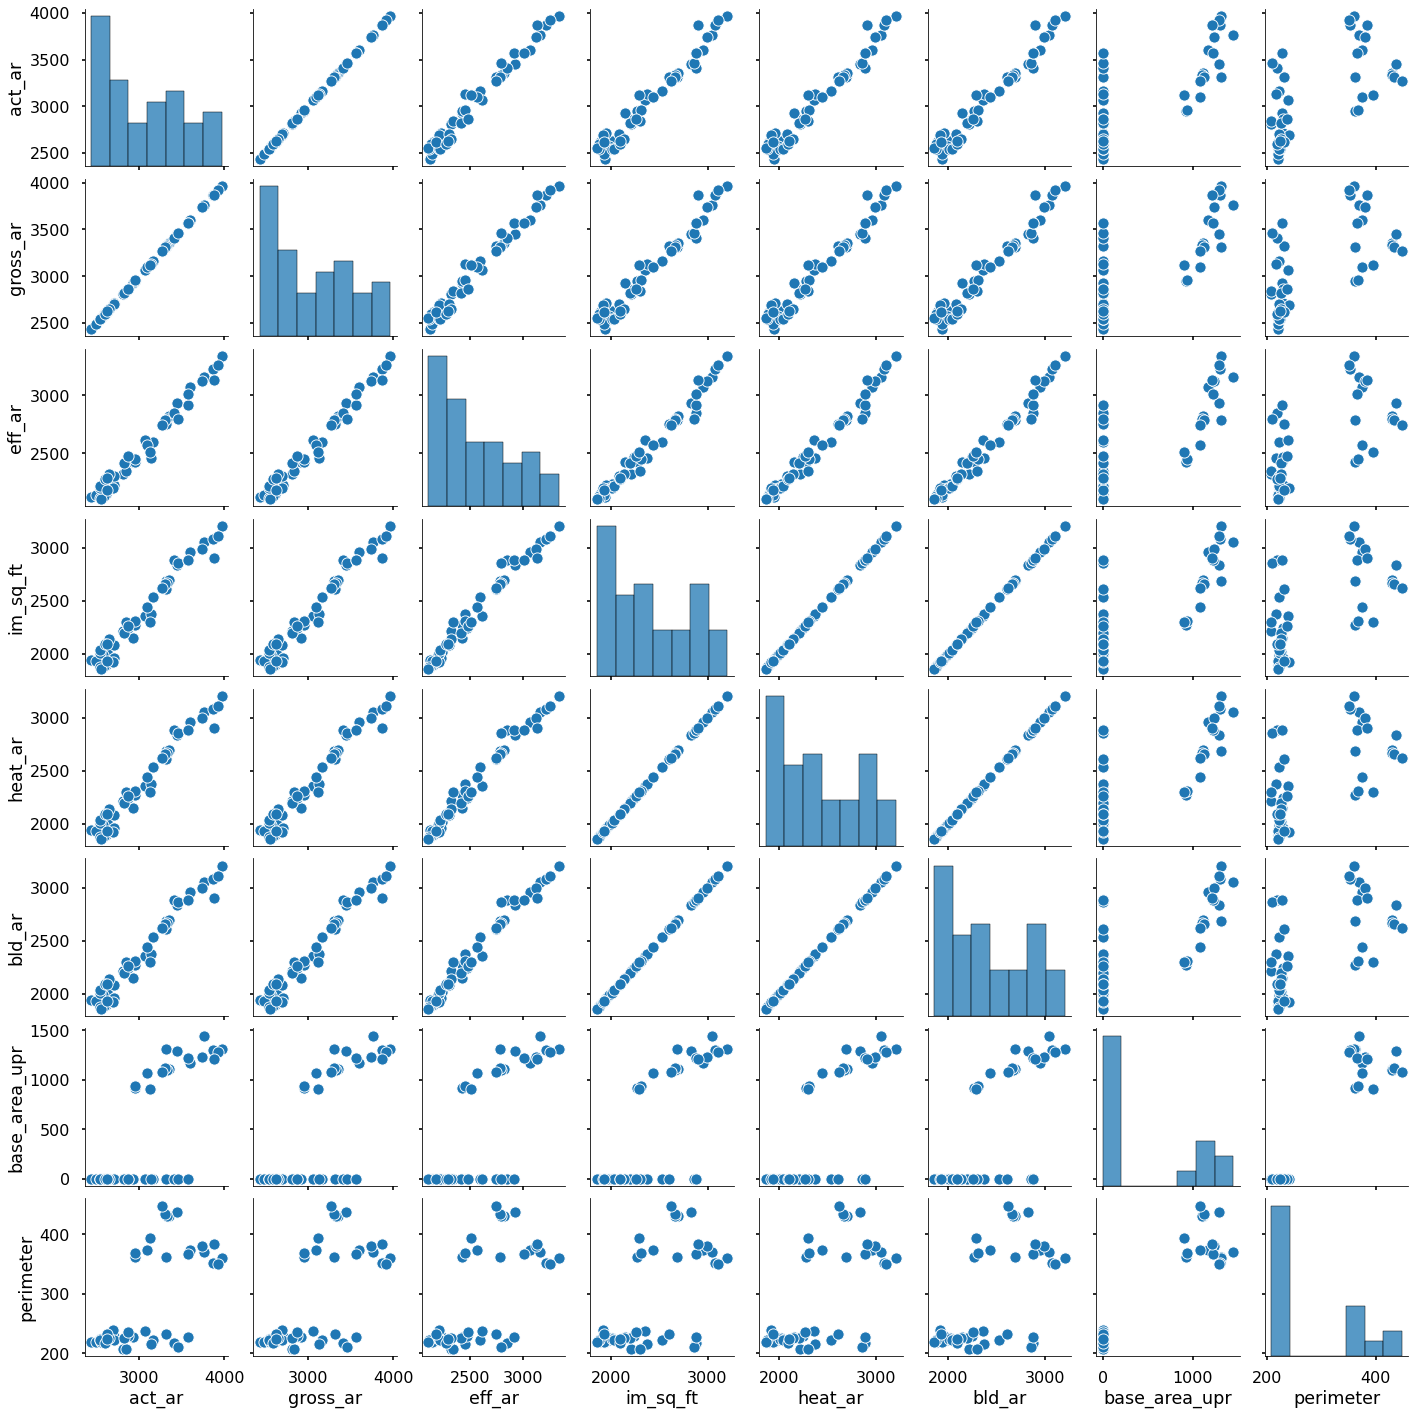

In [56]:
_ = sns.pairplot(subdiv_finished.loc[:, areas])

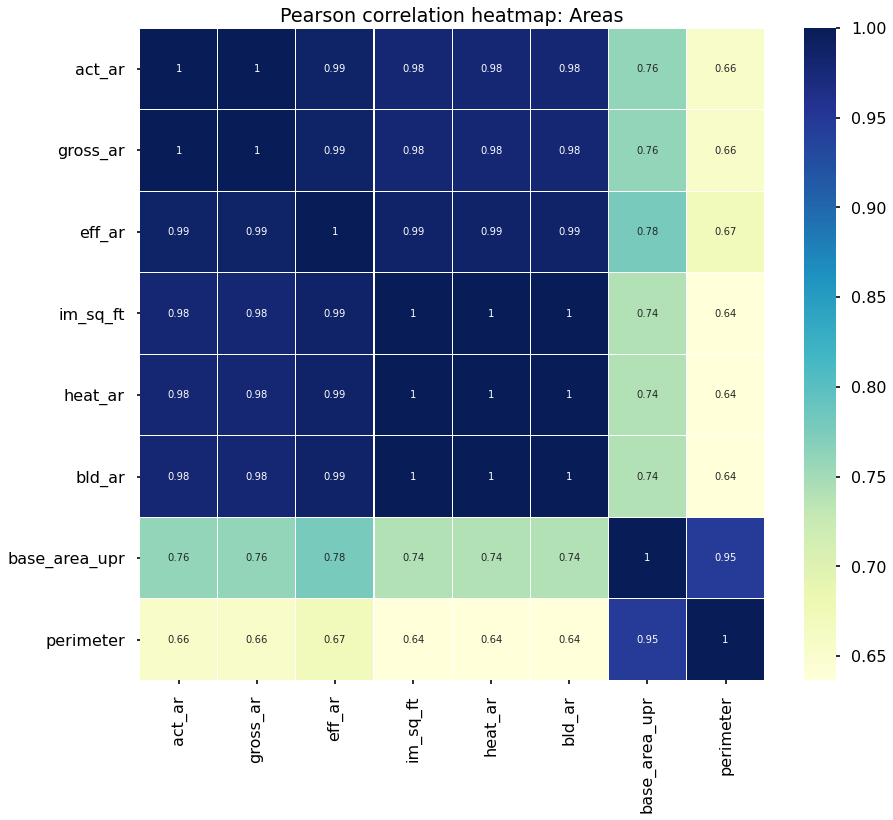

In [57]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(subdiv_finished.loc[:, areas].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Areas')

Since most areas are highly correlated between them, we can select one to continue our analysis. In addition, `base_area_upr` and `perimeter` are highly correlated so we can also select one of these two. From this group, I think the most accessible features are the improvement area (`im_sq_ft`) since it represents the sum of all the areas of the buildings in the property and the perimeter. These values should be relatively easy to obtain for a homeowner. 

## Fixtures

In [58]:
fixtures = [
    'fixtures_total',
    'room_half_bath',
    'room_total',
    'room_bedroom',
    'room_rec',
    'room_full_bath',
    'story_height_index'
]

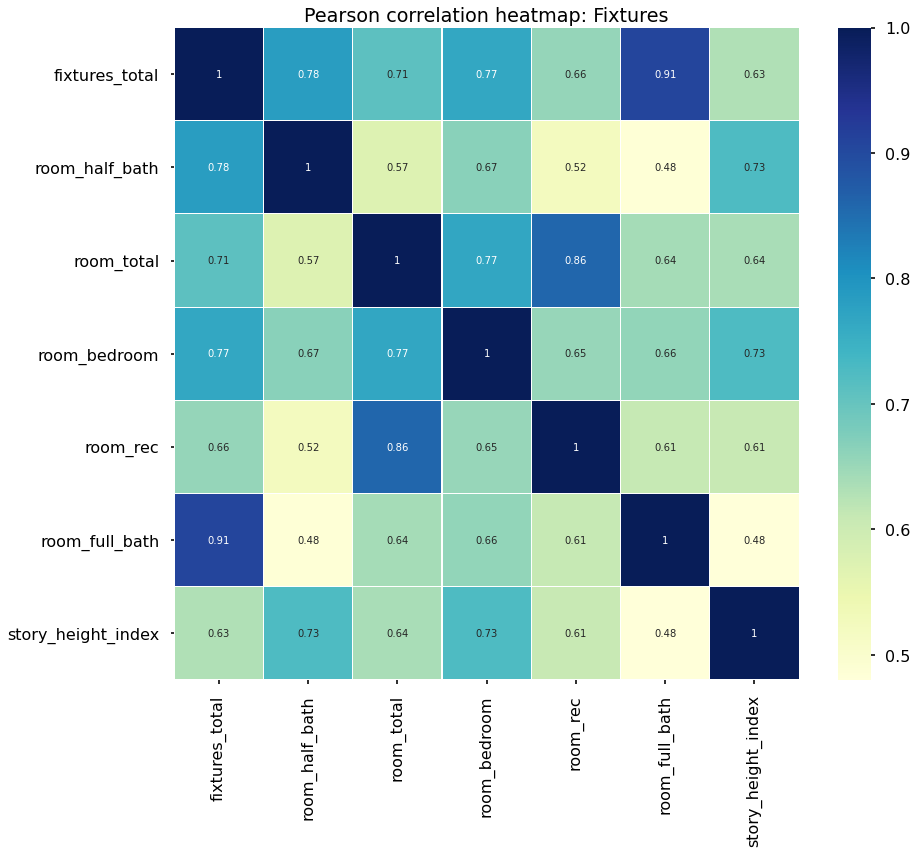

In [59]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(subdiv_finished.loc[:, fixtures].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Fixtures')

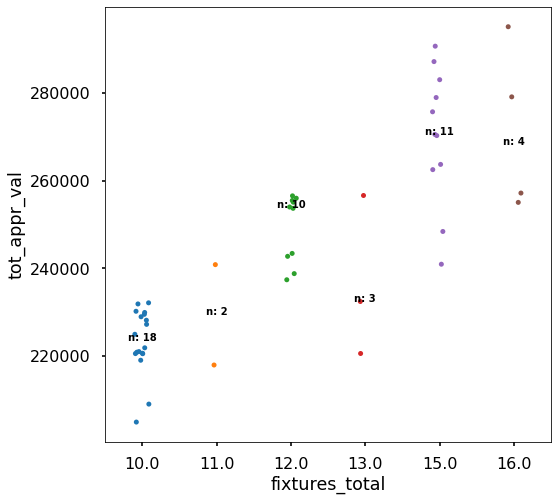

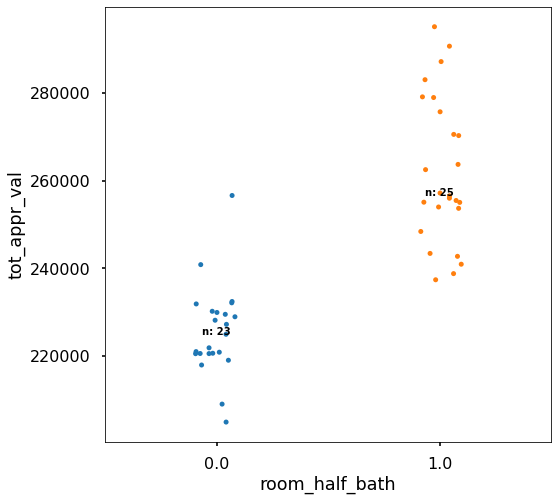

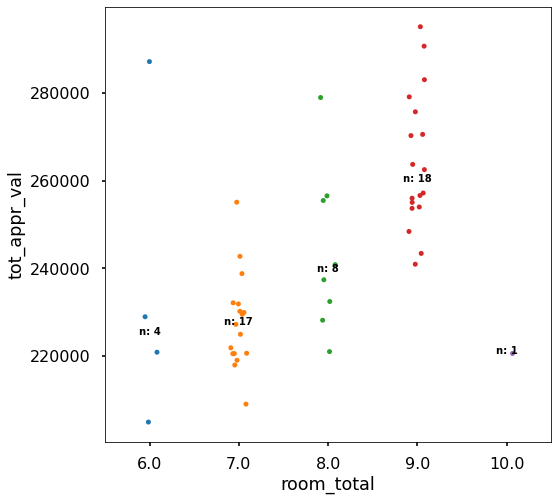

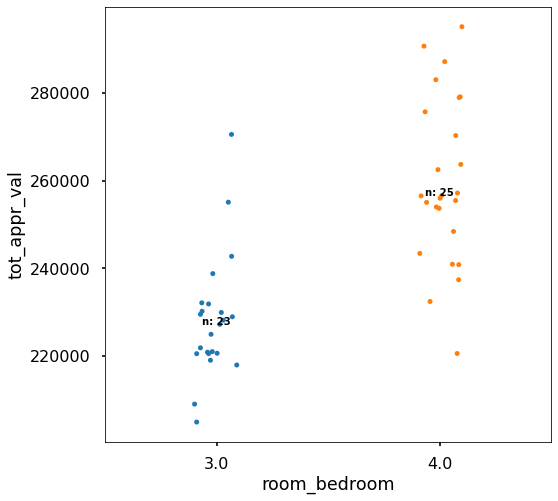

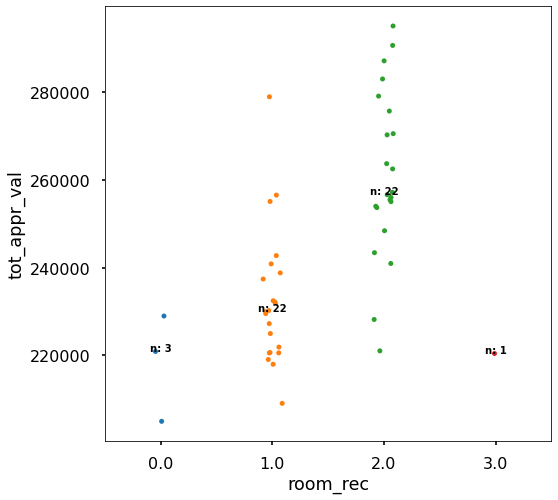

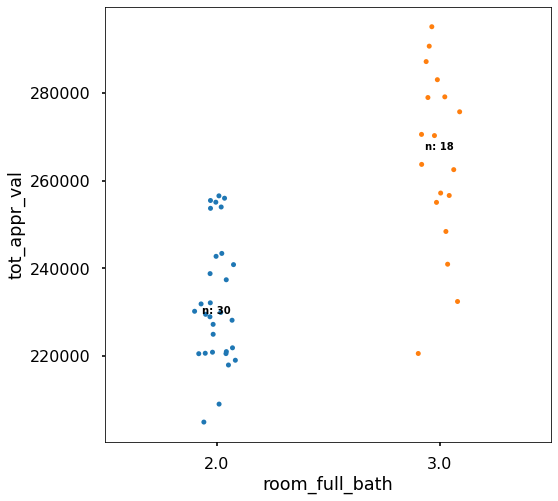

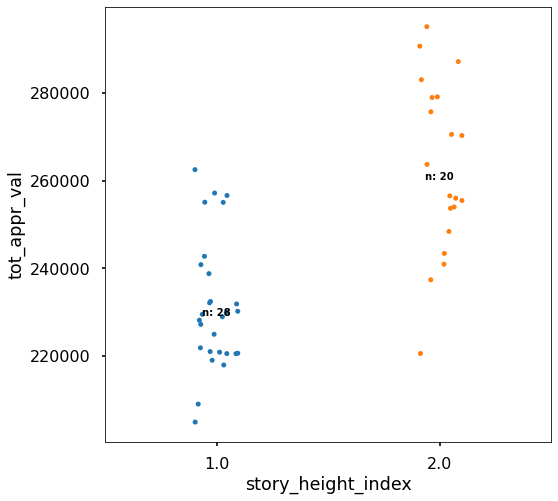

In [60]:
for fixture in fixtures:
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sns.stripplot(x=fixture, y='tot_appr_val', data=subdiv_finished)
    
    # Calculate number of obs per group & median to position labels
    medians = subdiv_finished.groupby([fixture])['tot_appr_val'].median().values
    nobs = subdiv_finished[fixture].value_counts().sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='medium', color='k', weight='bold')

It looks like independently of the selected fixture, the more the merrier (more valuable house). Also, they are not as well correlated between them as the house areas evaluated before.

# Check independence of selected features

## Is the total number of bathrooms a function of the house size?

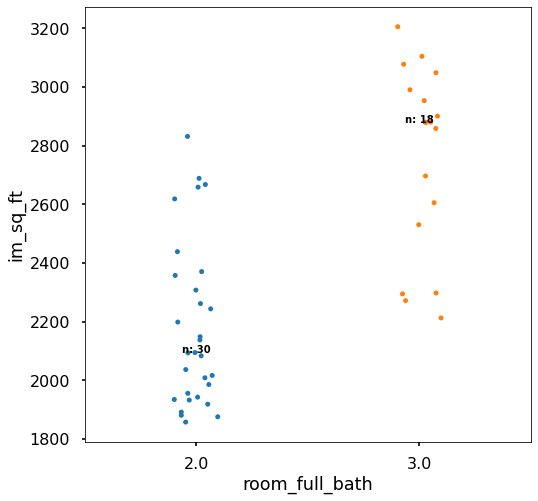

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.stripplot(x='room_full_bath', y='im_sq_ft', data=subdiv_finished)

# Calculate number of obs per group & median to position labels
medians = subdiv_finished.groupby(['room_full_bath'])['im_sq_ft'].median().values
nobs = subdiv_finished['room_full_bath'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='medium', color='k', weight='bold')

It looks like the bigger the house the more full bathrooms it has.

I think there is enough variability in this plot to keep both features.

## Re-run sweetviz on selected features

In [62]:
keep = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'im_sq_ft',
    'perimeter',
    'fixtures_total',
    'room_half_bath',
    'room_total',
    'room_bedroom',
    'room_rec',
    'room_full_bath',
    'story_height_index'
]

In [63]:
features = subdiv_finished.loc[:, keep]

In [64]:
if False:
    my_report = sv.analyze(features, target_feat='tot_appr_val')
    my_report.show_html(filepath='SWEETVIZ_REPORT_subdivision_finished_features.html')

Now the dependency between the selected features is clear in the sweetviz association plot:

![Sweetviz selected features only association](figures/sv_features_association_subdivision_finished.png)

There is a lot of dependence between these features, so we need to approach the modeling step one feature at a time, to understand the contribution of each to the prediction.

Next, we should build a model to predict the value of the target house given the data.

# Export features

In [65]:
save_fn = ROOT_DIR / 'data/interim/2016/features.pickle'
save_pickle(features, save_fn)

## Build linear model

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = comps['prior_tot_appr_val']
y = comps['yy_pct_change']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
X_train = X_train.to_numpy().reshape(-1, 1)
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
X_test = X_test.to_numpy().reshape(-1, 1)
y_pred = model.predict(X_test)

In [ ]:
x = X.to_numpy().reshape(-1, 1)

plt.figure(figsize=(10, 10))
_ = plt.scatter(x, y, marker='.', label='All data')
_ = plt.plot(x, model.predict(x), color='red', label='Prediction')
_ = plt.xlabel('prior_tot_appr_val')
_ = plt.ylabel('yy_pct_change')

_ = plt.legend(loc='lower right')

In [ ]:
plt.figure(figsize=(10, 10))
_ = plt.scatter(y_test, y_pred, marker='.', label='Predicted and actual')
_ = plt.plot([-1, 1], [-1, 1], color='black', label='Perfect corr. line')
_ = plt.xlabel('Actual yy_pct_change')
_ = plt.ylabel('Predicted yy_pct_change')

_ = plt.legend(loc='lower right')

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
x = model.predict(X_train)
y = y_train - x

In [ ]:
plt.figure(figsize=(10, 10))
_ = plt.scatter(x, y, marker='.', label='Residuals')
_ = plt.xlabel('Fitted yy_pct_change (predicted)')
_ = plt.ylabel('Residual')

But since there is a wide range of appraised values, it might be best to focus on the percent change difference from last to this year, so we can observe if there is a pattern using all the samples.